# Exploratory Data Analysis - Heart Disease Dataset

This notebook performs comprehensive EDA on the Heart Disease UCI dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os

# Add src to path and set project root
project_root = Path('..').resolve()
sys.path.append(str(project_root))
os.chdir(project_root)  # Change working directory to project root

# Import data functions
from src.data.download import download_heart_disease_dataset
from src.data.preprocessing import load_and_preprocess_data

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Download dataset if it doesn't exist
data_path = project_root / "data" / "raw" / "heart_disease.csv"
if not data_path.exists():
    print("Dataset not found. Downloading...")
    download_heart_disease_dataset()
    print("Download complete!")
else:
    print(f"Dataset found at {data_path}")

Dataset found at C:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\data\raw\heart_disease.csv


## 1. Load Data

In [6]:
# Load data
X, y, feature_names = load_and_preprocess_data()
df = pd.concat([X, y], axis=1)

print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {feature_names}")
df.head()

Dataset shape: (303, 14)

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


C:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\src\data\preprocessing.py:114: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_val, inplace=True)
C:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\src\data\preprocessing.py:114: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Data Overview

In [7]:
# Basic statistics
print("Dataset Info:")
print(df.info())
print("\n" + "="*50)
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


Basic Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944 

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\n✓ No missing values found")

Missing Values:
Series([], dtype: int64)

✓ No missing values found


## 3. Target Variable Analysis

Target Distribution:
target
0    164
1    139
Name: count, dtype: int64

Class balance: 54.13% vs 45.87%


C:\Users\azhar\AppData\Local\Temp\ipykernel_27008\1443732374.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the group

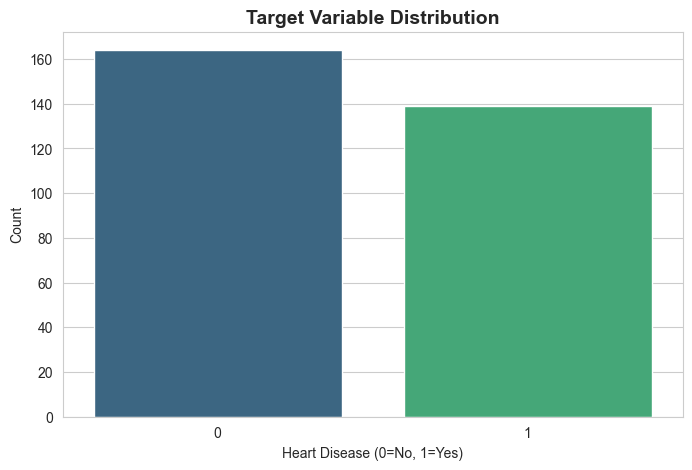

In [9]:
# Target distribution
target_counts = y.value_counts()
print("Target Distribution:")
print(target_counts)
print(f"\nClass balance: {target_counts[0] / len(y):.2%} vs {target_counts[1] / len(y):.2%}")

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='viridis')
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## 4. Feature Distributions

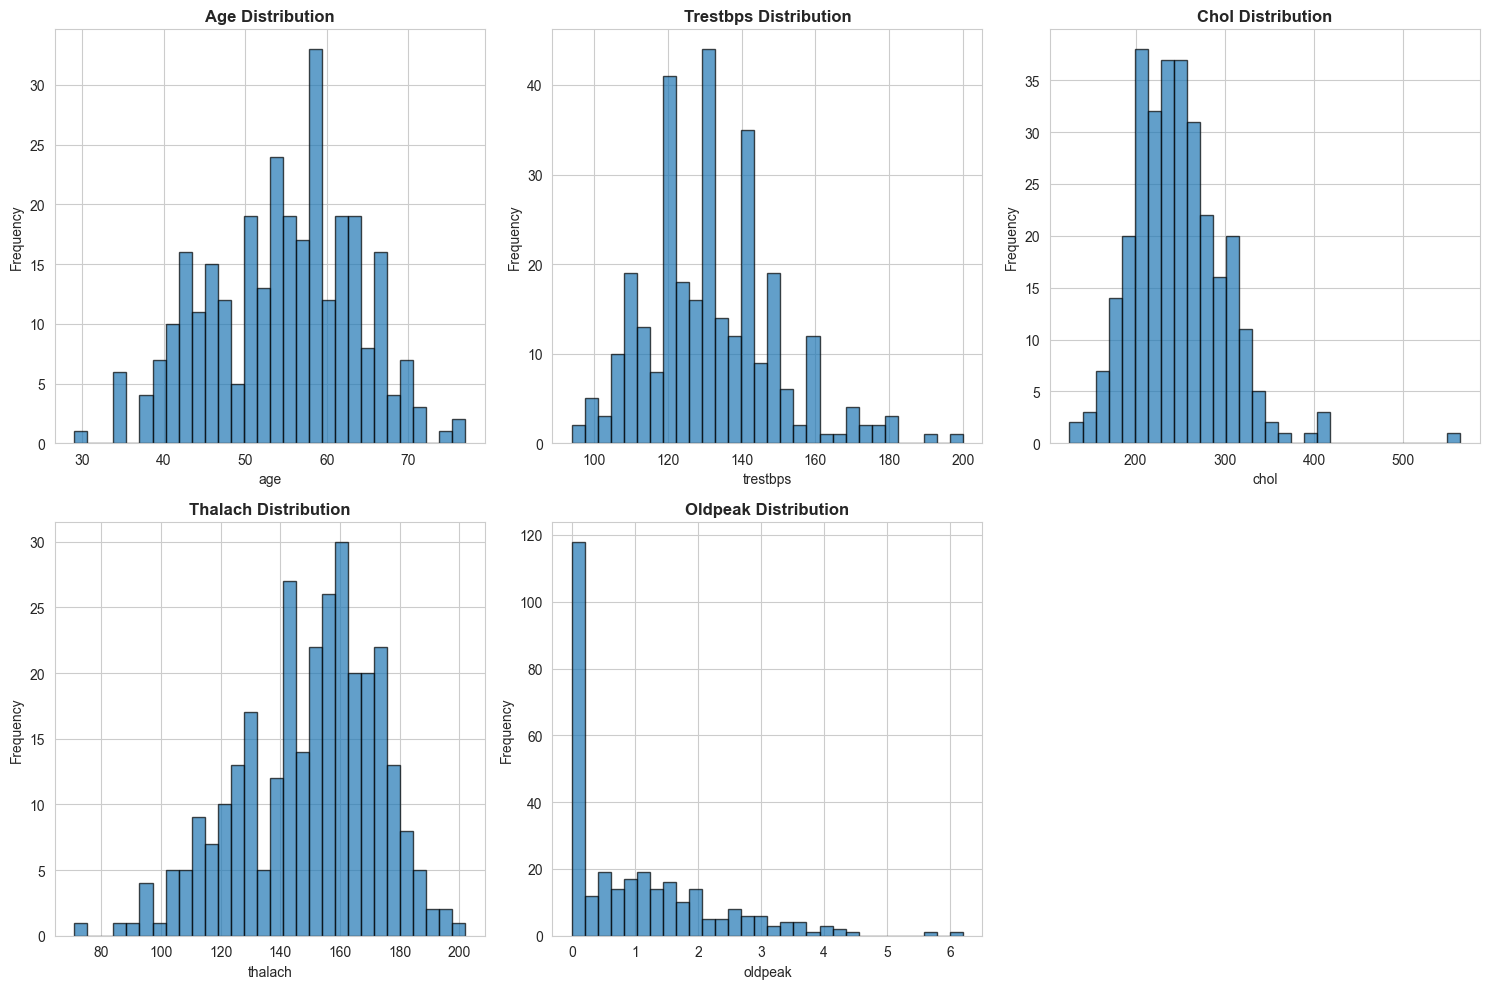

In [10]:
# Histograms for numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature.capitalize()} Distribution', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

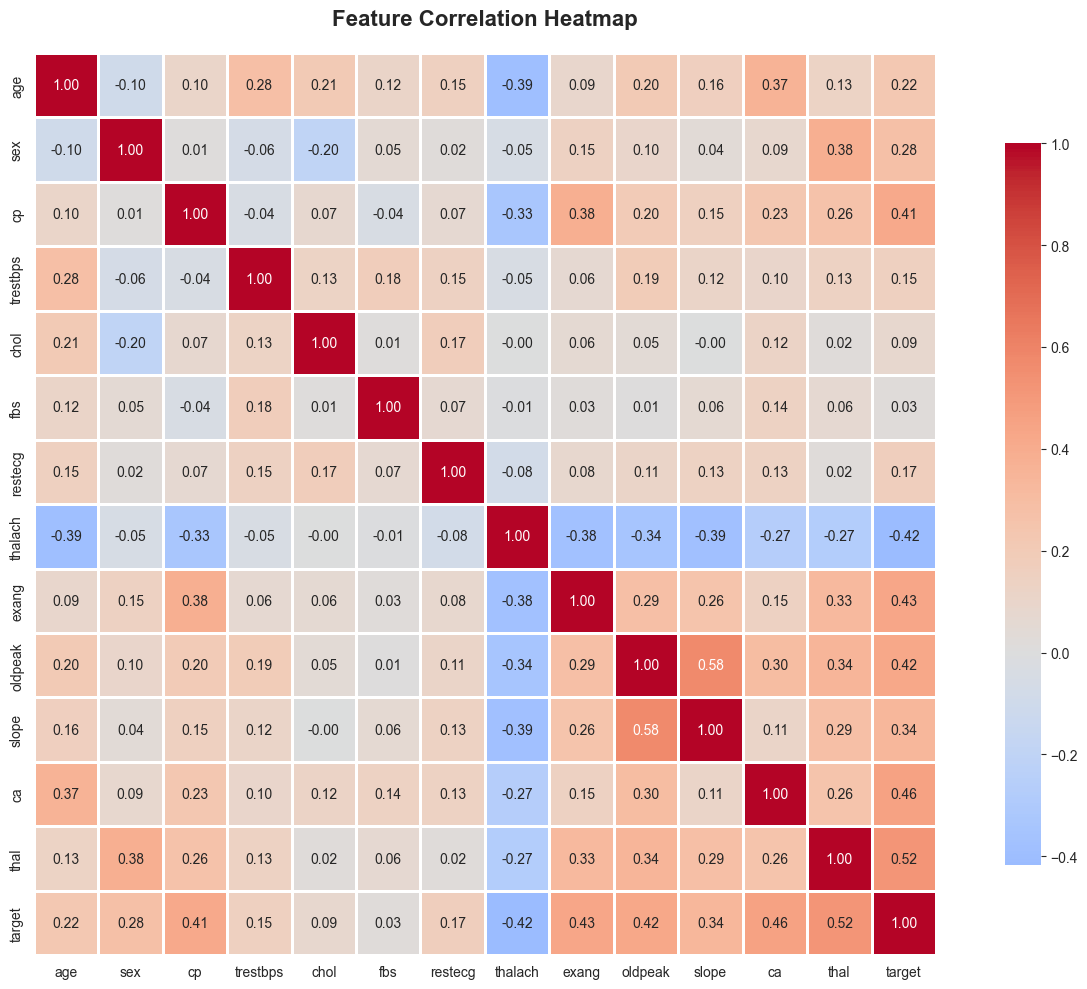

In [11]:
# Correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

C:\Users\azhar\AppData\Local\Temp\ipykernel_27008\2732638198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdYlGn_r')
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the gro

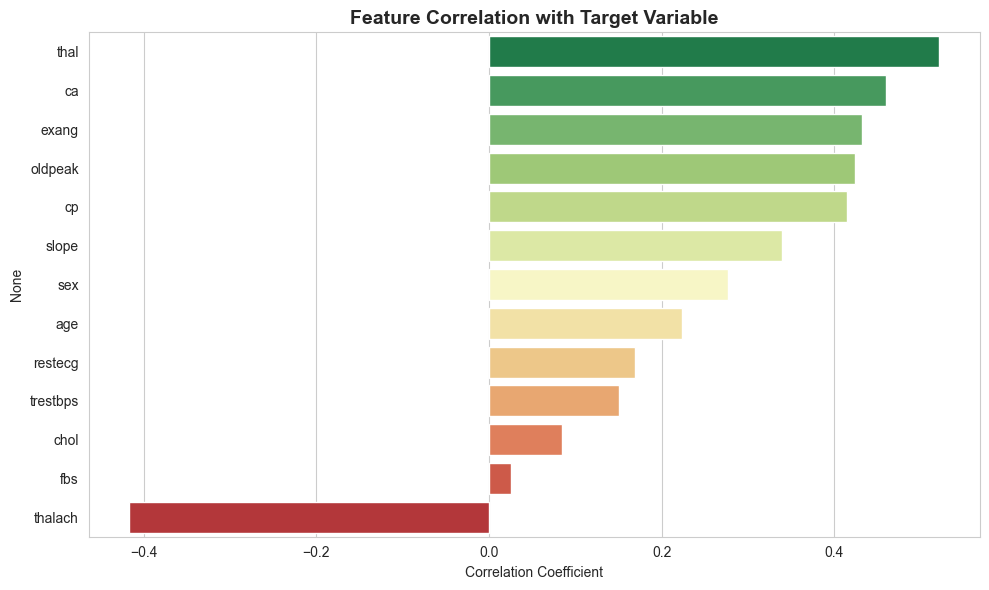

In [12]:
# Correlation with target
target_corr = df.corr()['target'].sort_values(ascending=False)
target_corr = target_corr.drop('target')

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdYlGn_r')
plt.title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## 6. Feature Analysis by Target

C:\Users\azhar\AppData\Local\Temp\ipykernel_27008\867714972.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='Set2')
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\azhar\BITS\Sem3\MLOPS\Assignment1\venv\Lib\site-packages\seaborn\_base.py:9

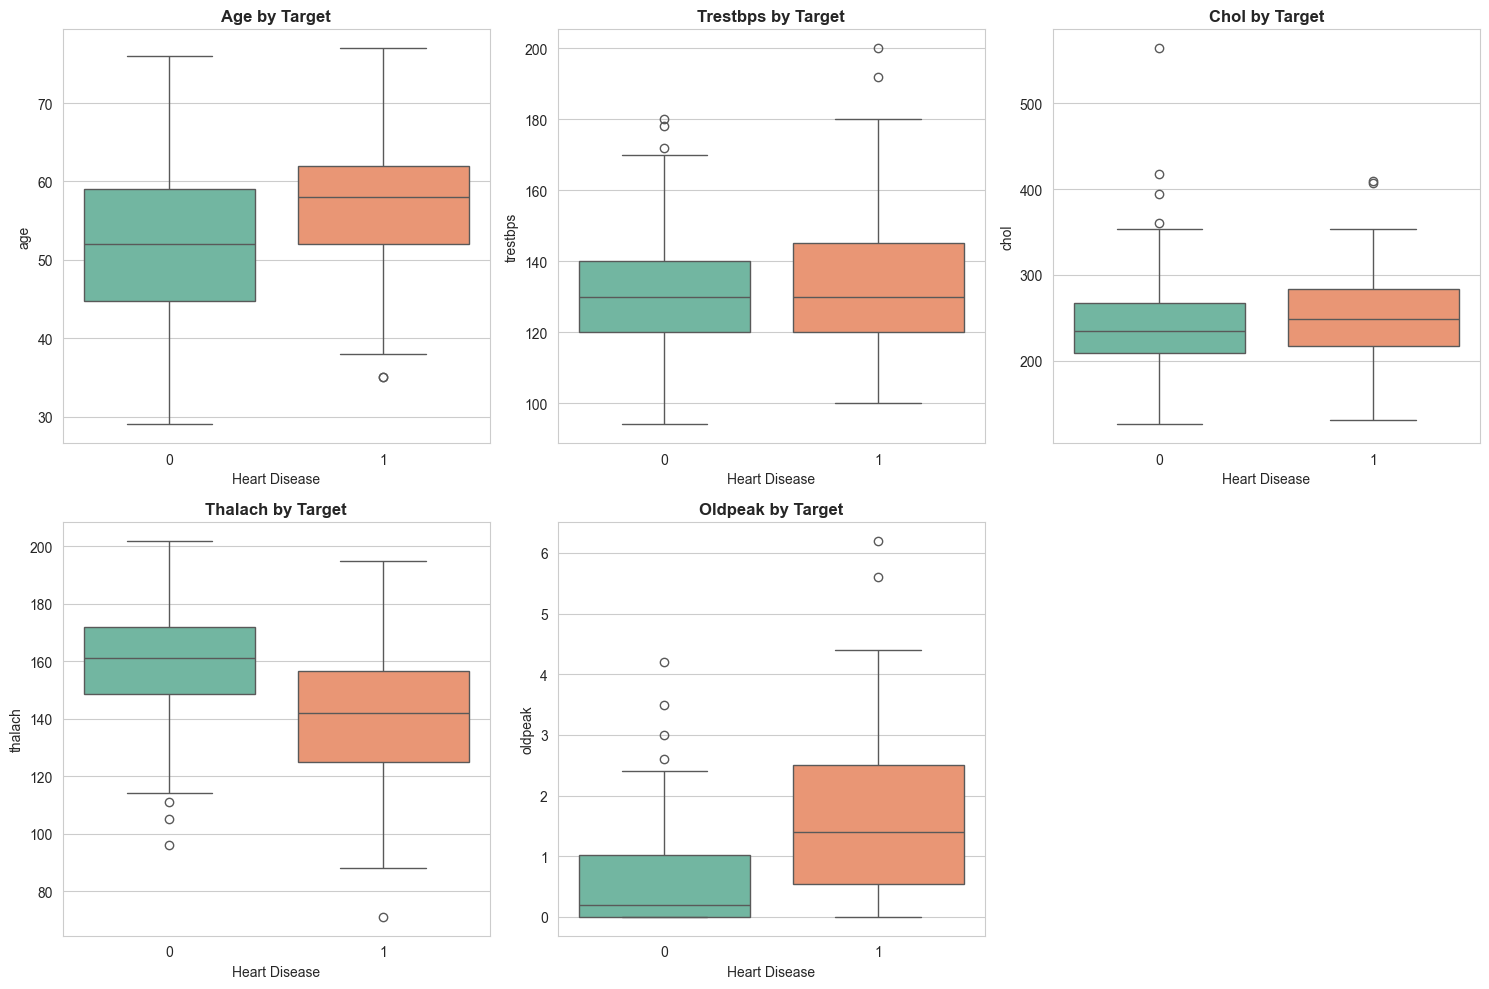

In [13]:
# Box plots for key features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature.capitalize()} by Target', fontweight='bold')
    axes[i].set_xlabel('Heart Disease')

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()